In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scrapy
from bs4 import BeautifulSoup
from requests import get
import datetime
import time
import re

In [39]:
base_url = "https://www.usclimatedata.com/climate/buffalo/new-york/united-states/usny0181"
page = get(base_url)

In [10]:
soup = BeautifulSoup(page.text, 'html.parser')

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-NGZ4B4W');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start Meta Tags -->
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Buffalo weather averages and climate Buffalo, New York. Monthly temperature, precipitation and hours of sunshine. A climate graph showing rainfall, temperatures and normals." name="description"/>
  <meta content="c

In [40]:
def month_name(abc):
    dict = {'Jan':"January", 'Feb':"February", 'Mar':"March", 'Apr': "April", 'May': "May", 'Jun': "June", 'Jul': "July", 'Aug': "August", 'Sep': "September", 'Oct': "October", 'Nov': "November", 'Dec': "December"} 
    for i in dict:
        if abc[-3:] == i:
            return abc.replace(abc[-3:], dict[i])

In [85]:
dcontent = []
content = []
for i in range(2015, 2019):
    for j in range(1,13):
        base_url = "https://www.usclimatedata.com/climate/buffalo/new-york/united-states/usny0181/"
        full_url = base_url + str(i) + "/" + str(j)
        page = get(full_url)
        soup = BeautifulSoup(page.text, 'html.parser')
        tbl = soup.find_all('div', class_= "history_table_div")
        table_body = tbl[0].find('tbody')
        #print(table_body)

        #gather all the rows of the table
        rows = table_body.find_all('tr')

        #for each row in rows
        for r in rows:
            #gather all the elements of each row
            cols = r.find_all('td')
            dcol = r.find_all('th')
            #strip and get text for each element in the row, creating an array
            column = [t.text.strip() for t in cols]
            dcolumn = [t.text.strip() for t in dcol]
            #append the array of elements
            content.append([t for t in column if t])
            tf = month_name(dcolumn[0])
            abc = str(i)
            tff = tf + " " + abc
            dcontent.append(tff)
        
        time.sleep(5)    
        
        
        

#sleep so we don't hurt the website we're pulling data from
#T is trace, meaning light, unmeasurable precipitationd
content

[['32.0', '20.1', 'T', '0.31', '1.2'],
 ['33.1', '22.1', 'T', 'T', '1.2'],
 ['48.0', '22.1', '0.58', 'T', 'T'],
 ['55.0', '28.2', '0.52', 'T', '0.0'],
 ['28.2', '9.1', 'T', '0.12', 'T'],
 ['18.1', '10.2', '0.02', '0.98', '1.2'],
 ['17.2', '2.1', '0.03', '0.79', '1.2'],
 ['15.3', '5.2', '0.12', '3.82', '2.0'],
 ['19.2', '9.1', '0.40', '6.50', '9.8'],
 ['18.1', '5.2', '0.08', '2.91', '7.1'],
 ['31.1', '14.2', '0.03', '0.31', '9.1'],
 ['31.1', '15.3', '0.34', '3.58', '7.9'],
 ['15.3', '2.1', 'T', '0.12', '9.1'],
 ['21.2', '-3.8', '0.00', 'T', '7.9'],
 ['29.1', '14.2', 'T', '0.12', '7.9'],
 ['30.2', '7.2', 'T', '0.20', '7.1'],
 ['41.0', '1.2', '0.00', '0.00', '7.1'],
 ['44.1', '33.1', '0.04', '0.12', '5.1'],
 ['33.1', '22.1', 'T', '0.12', '3.1'],
 ['23.2', '12.2', 'T', 'T', '2.0'],
 ['28.2', '7.2', 'T', 'T', '2.0'],
 ['29.1', '20.1', 'T', 'T', '2.0'],
 ['29.1', '23.2', 'T', 'T', '2.0'],
 ['32.0', '24.3', '0.03', '0.12', '2.0'],
 ['32.0', '13.1', 'T', '0.12', '2.0'],
 ['19.2', '13.1', '0.10

In [101]:
df2 = pd.DataFrame(content)

In [103]:
df2["Date"] = dcontent 
df2.columns = ["MaxTemp", "MinTemp", "Precipitation","Snowfall","Snow_depth","Date"]

In [70]:
"""dcontent = []
content = []
base_url = "https://www.usclimatedata.com/climate/buffalo/new-york/united-states/usny0181/2015/1"
page = get(base_url)
soup = BeautifulSoup(page.text, 'html.parser')
tbl = soup.find_all('div', class_= "history_table_div")
table_body = tbl[0].find('tbody')
        #print(table_body)

        #gather all the rows of the table
rows = table_body.find_all('tr')
i = 2015
        #for each row in rows
for r in rows:
            #gather all the elements of each row
            cols = r.find_all('td')
            dcol = r.find_all('th')
            #strip and get text for each element in the row, creating an array
            column = [t.text.strip() for t in cols]
            dcolumn = [t.text.strip() for t in dcol]
            #append the array of elements
            content.append([t for t in column if t])
            tf = month_name(dcolumn[0])
            abc = str(i)
            tff = tf + " " + abc
            dcontent.append(tff)"""

2015


str

In [92]:
tff

'31 December 2015'

In [93]:
dcolumn[0]

'31 Dec'

In [80]:
#df['date'] = dcontent + df['date'].astype('datetime64[ns]')

In [104]:
df2

,MaxTemp,MinTemp,Precipitation,Snowfall,Snow_depth,Date
0,32.0,20.1,T,0.31,1.2,01 January 2015
1,33.1,22.1,T,T,1.2,02 January 2015
2,48.0,22.1,0.58,T,T,03 January 2015
3,55.0,28.2,0.52,T,0.0,04 January 2015
4,28.2,9.1,T,0.12,T,05 January 2015
5,18.1,10.2,0.02,0.98,1.2,06 January 2015
6,17.2,2.1,0.03,0.79,1.2,07 January 2015
7,15.3,5.2,0.12,3.82,2.0,08 January 2015
8,19.2,9.1,0.40,6.50,9.8,09 January 2015
9,18.1,5.2,0.08,2.91,7.1,10 January 2015


In [ ]:
"""str = "2015"
str += '% s'
dcontent = [str % i for i in dcontent] """

In [ ]:
"""from datetime import datetime
from dateutil.relativedelta import relativedelta

format_string = "%Y['%d %B']"
array_length = len(dcontent)
for i in range(array_length):
    datetime_object = datetime.strptime(dcontent[i], format_string).date()"""

In [106]:
df2.Date = pd.to_datetime(df2.Date)


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
MaxTemp          365 non-null object
MinTemp          365 non-null object
Precipitation    365 non-null object
Snowfall         365 non-null object
Snow_depth       365 non-null object
Date             365 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 17.2+ KB


In [109]:
df2

,MaxTemp,MinTemp,Precipitation,Snowfall,Snow_depth,Date
0,32.0,20.1,T,0.31,1.2,2015-01-01
1,33.1,22.1,T,T,1.2,2015-01-02
2,48.0,22.1,0.58,T,T,2015-01-03
3,55.0,28.2,0.52,T,0.0,2015-01-04
4,28.2,9.1,T,0.12,T,2015-01-05
5,18.1,10.2,0.02,0.98,1.2,2015-01-06
6,17.2,2.1,0.03,0.79,1.2,2015-01-07
7,15.3,5.2,0.12,3.82,2.0,2015-01-08
8,19.2,9.1,0.40,6.50,9.8,2015-01-09
9,18.1,5.2,0.08,2.91,7.1,2015-01-10


In [113]:
print(df2['Snowfall'].unique(), df2["Snow_depth"].unique())

['0.31' 'T' '0.12' '0.98' '0.79' '3.82' '6.50' '2.91' '3.58' '0.20' '0.00'
 '1.61' '0.91' '1.81' '0.59' '4.41' '8.19' '0.71' '5.39' '2.28' '1.10'
 '2.40' '2.72' '1.42' '0.51' '6.89' '2.09' '0.39' '1.50' '1.89' '1.18'] ['1.2' 'T' '0.0' '2.0' '9.8' '7.1' '9.1' '7.9' '5.1' '3.1' '3.9' '5.9'
 '13.0' '16.1' '18.1' '20.9' '22.0' '22.8' '26.0' '25.2' '24.0' '20.1'
 '14.2']


In [114]:
df2 = df2.dropna(axis = 0)

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
MaxTemp          365 non-null object
MinTemp          365 non-null object
Precipitation    365 non-null object
Snowfall         365 non-null object
Snow_depth       365 non-null object
Date             365 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 20.0+ KB


In [131]:
df2.isnull().sum()

MaxTemp          0
MinTemp          0
Precipitation    0
Snowfall         0
Snow_depth       0
Date             0
dtype: int64

In [116]:
#T as in Trace, signifies the event of very low quantity, negligible, but existent. I'm taking T = 0.001
df2.Precipitation.replace(to_replace = "T", value = "0.001", inplace = True)
df2.Snowfall.replace(to_replace = "T", value = "0.001", inplace = True)
df2.Snow_depth.replace(to_replace = "T", value = "0.001", inplace = True)

In [118]:
df2.head(10)

,MaxTemp,MinTemp,Precipitation,Snowfall,Snow_depth,Date
0,32.0,20.1,0.001,0.31,1.2,2015-01-01
1,33.1,22.1,0.001,0.001,1.2,2015-01-02
2,48.0,22.1,0.58,0.001,0.001,2015-01-03
3,55.0,28.2,0.52,0.001,0.0,2015-01-04
4,28.2,9.1,0.001,0.12,0.001,2015-01-05
5,18.1,10.2,0.02,0.98,1.2,2015-01-06
6,17.2,2.1,0.03,0.79,1.2,2015-01-07
7,15.3,5.2,0.12,3.82,2.0,2015-01-08
8,19.2,9.1,0.40,6.50,9.8,2015-01-09
9,18.1,5.2,0.08,2.91,7.1,2015-01-10


In [123]:
df2.MaxTemp = df2.MaxTemp.astype(float)
df2.MinTemp = df2.MinTemp.astype(float)
df2.Snowfall = df2.Snowfall.astype(float)
df2.Snow_depth = df2.Snow_depth.astype(float)
df2.Precipitation = df2.Precipitation.astype(float)

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
MaxTemp          365 non-null float64
MinTemp          365 non-null float64
Precipitation    365 non-null float64
Snowfall         365 non-null float64
Snow_depth       365 non-null float64
Date             365 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 20.0 KB


C:\Users\Syed hasan\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Inches of precipitation')

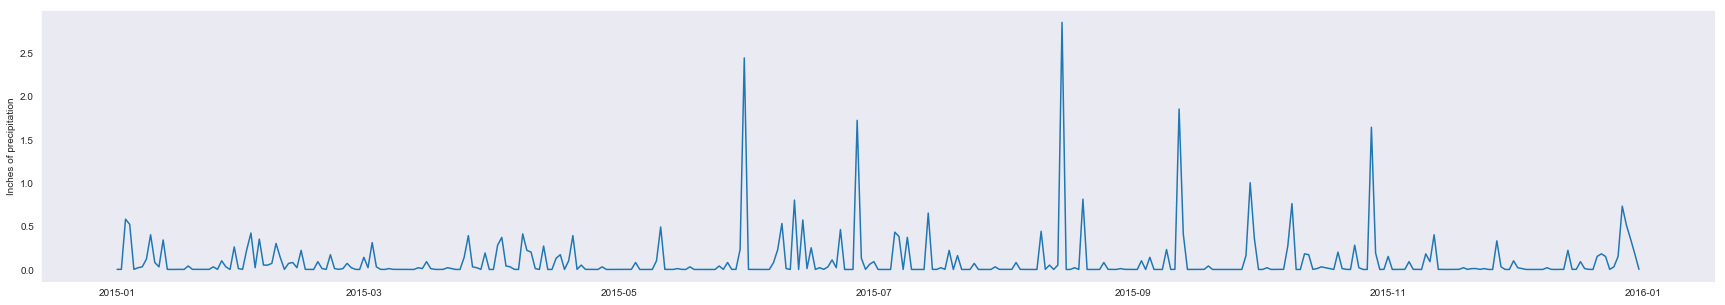

In [125]:
sns.set_style("dark")
plt.figure(figsize = (30, 5))
plt.plot(df2.Date, df2.Precipitation)
plt.ylabel("Inches of precipitation")

Text(0, 0.5, 'Inches of precipitation')

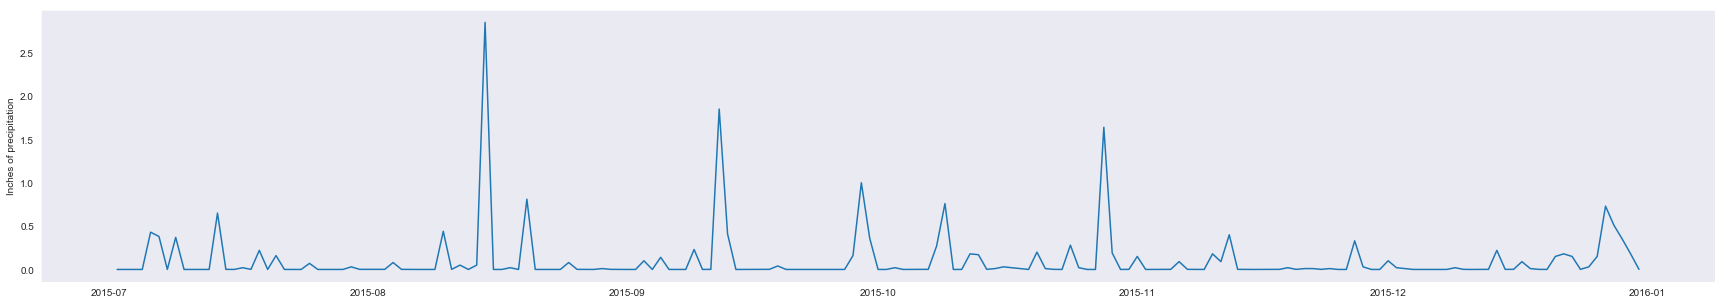

In [130]:
# See for 2016 and others to determine seasonality and all
DD = df2.Date.loc[182:365]
PP = df2.Precipitation.loc[182:365]
sns.set_style("dark")
plt.figure(figsize = (30, 5))
plt.plot(DD, PP)
plt.ylabel("Inches of precipitation")

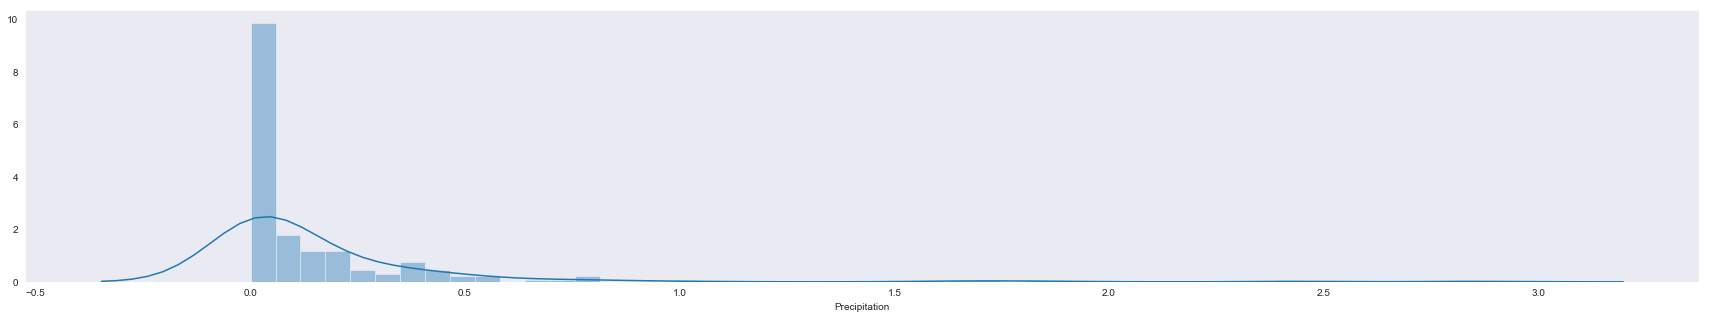

In [127]:
plt.figure(figsize = (30, 5))
sns.distplot(df2.Precipitation[df2.Precipitation>0], 
    label = "rain")